(-0.5, 99.5, 99.5, -0.5)

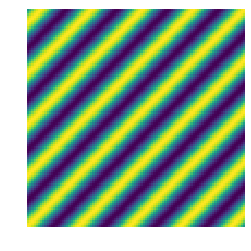

In [0]:
## ReceptiveFields.ipynb
# Written by Mike Manookin

# Imports
import numpy as np
from pylab import *
import scipy.fftpack

# Early physiological studies made several key observations about the 
# fundamental organization of neurons in the early visual system.
#
# 1. Some cells respond to increases in light intensity with an increase in
# spiking, while others respond to decreases in light intensity. These cells are 
# termed ON and OFF cells, respectively.
# 
# 2. The responses properties of some cells initially appeared to be described
# well modeling the early visual system as a linear, time-invariant system. For
# this reason, many researchers for the past six decades have relied heavily on
# periodic spatial and temporal stimuli (e.g., drifting gratings, shown below) to
# measure how different cell types and circuits encoded different aspects of the
# visual input.

# Here, I will describe two different classical components of the linear filtering
# properties of cells in the early visual stream: spatial and temporal 
# receptive fields. 

# Goals of this tutorial:
# 1. Gain familiarity with the basic descriptions of the spatial and temporal
# properties of neurons used by many vision researchers.
# 2. Understand that responses to periodic stimuli are a consequence of the
# shapes (or filtering properties) of spatiotemporal receptive fields.


# Create a Difference of Gaussians (DoG) receptive field.
xMin = -10
xMax = 10
npts = 100
X = np.linspace(xMin,xMax,npts)
Y = np.linspace(xMin,xMax,npts)
r = X

# Create an x,y meshgrid.
x, y = np.meshgrid(X, Y)

spatialFrequency = 6 # Spatial frequency 
orientation = np.pi/4# Grating orientation in radians

grating = cos(cos(orientation)*(x/xMax*np.pi*spatialFrequency) + sin(orientation)*(y/xMax*np.pi*spatialFrequency))


# Let's look at the grating.
imshow(grating)
plt.axis('off')


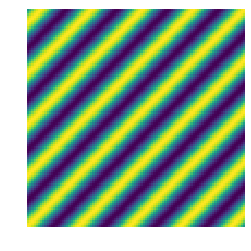

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# fig = plt.figure()
fig, ax = plt.subplots()

frameRate = 20 # Frame rate in frames/sec
temporalFrequency = 2 # Temporal frequency in cycles/sec
phase = 0

# im = plt.imshow(grating, animated=True)
im = ax.imshow(grating, animated=True)
plt.axis('off')

# initialization function: plot the background of each frame
def init():
    im.set_data(grating)
    return [im]

# animation function.  This is called sequentially
def updatefig(*args):
  global x, y, orientation, phase, frameRate, temporalFrequency, spatialFrequency, xMax
  phase += 1/frameRate * 2 * np.pi * temporalFrequency
  a = cos(phase + cos(orientation)*(x/xMax*np.pi*spatialFrequency) + sin(orientation)*(y/xMax*np.pi*spatialFrequency))
  #a = np.cos(phase + (np.cos(orientation)*x + np.sin(orientation)*y))
  im.set_array(a)
  return [im]

# Animate the grating.
ani = animation.FuncAnimation(fig, updatefig, init_func=init,
                              frames=frameRate, interval=frameRate, blit=True)
# Play the grating.
HTML(ani.to_html5_video())

# Go ahead and play with the grating parameters: spatial frequency, orientation,
# temporal frequency. You can pretend you're recording spike responses from cells
# to the stimuli. This is what was classically (and even now) was done.


Text(0, 0.5, 'response')

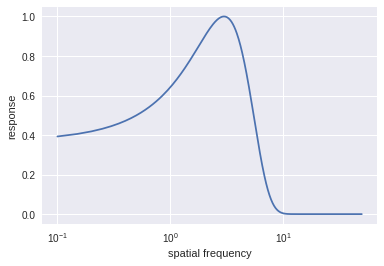

In [0]:
## Researchers presented these gratings and recorded the spike output of different
## cell types. They noticed that the spike output changed when they changed the
## spatial frequency of the gratings.

# Let's define a simple Gaussian bandpass function.
def gaussFun(x, A, xShift, sd):
  return A*np.exp(-((x-xShift)/sd)**2)

# Define some spatial frequencies.
sf = np.linspace(0.1,50,1000)
centerFrequency = 3
bandwidth = 3

# Often, a cell's spike output looked a lot like this... Note: I'm showing the
# plots on a logarithmic x-axis out of convention. If you prefer to see it on a
# linear axis change 'semilogx' to 'plot'...
semilogx(sf, gaussFun(sf,1, centerFrequency, bandwidth))
xlabel('spatial frequency'); ylabel('response')


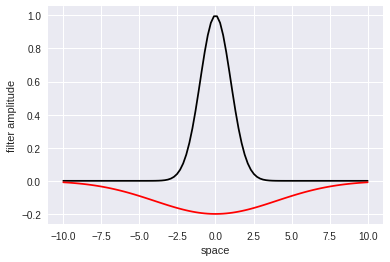

In [0]:
aCenter = 1.0 # Amplitude of center Gaussian
sigmaCenter = 1.0 # Standard deviation of center Gaussian
aSurround = 0.2 # Amplitude of opponent surround Gaussian
sigmaSurround = 4.0 # Standard deviation of opponent surround Gaussian
center = aCenter*np.exp(-( r**2 / ( 2.0 * sigmaCenter**2 ) ) )
surround = aSurround*np.exp(-( r**2 / ( 2.0 * sigmaSurround**2 ) ) )


## First let's look at the center and surround components separately.

plot(X,center,'k')
xlabel('space'); ylabel('filter amplitude')

## The surround is of opposite sign to the center, meaning that the same stimulus
## falling in the center and surround will have opposing effects on the cell's
## spike output.
plot(X, -surround, 'r')

## What type of cell is this (ON, OFF, or ON-OFF)?



Text(0.5, 1.0, 'difference of Gaussians (Mexican hat) receptive field')

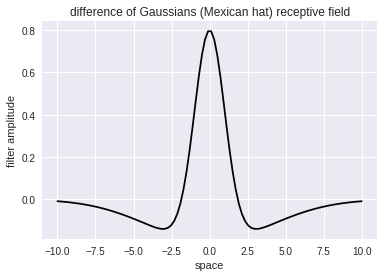

In [0]:
## If you guessed "ON", you were right! Because the receptive-field center is
## is tuned to increases in light intensity, it's an ON cell.

## The spatial receptive field is modeled as the difference between the center 
## surround Gaussians. 
rf = center - surround

## Plot the resulting difference of Gaussians.
plot(X, rf, 'k')
xlabel('space'); ylabel('filter amplitude')
title('difference of Gaussians (Mexican hat) receptive field')

## How do we interpret this receptive field?
##
## The cell responded best to an increase in light intensity over the center 
## (i.e., at point 0 on the x-axis) and/or to a decrease in light intensity 
## on the flanks (radii > ~2).


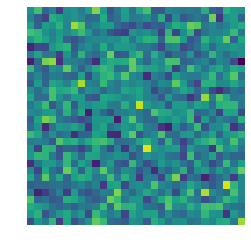

In [0]:
# There are two main ways to measure linear receptive fields. 
# 1. As we've seen, you can present a series of moving gratings at series of
# spatial frequencies, orientations, contrasts, and temporal frequencies (we'll 
# deal with temporal processing below).
#
# 2. Researchers realized that instead of running through all of the possible 
# combinations of grating stimuli, you could obtain the same information (and
# potentially more) by using a single stimulus: white noise. It's "white" because
# neighboring regions in space and time are uncorrelated with one another. Some
# people lovingly refer to this stimulus as the "random garbage stimulus" for
# reasons you'll see when you play this animation. Essentially, you would play
# this stimulus to a cell for an extended period of time and record the spike
# responses of that cell. By doing some fairly straightforward analysis, you
# could then get the receptive-field structure.

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

frameRate = 20 # Frame rate in frames/sec

im = ax.imshow(np.random.randn(30,30), animated=True)
plt.axis('off')
# initialization function: plot the background of each frame
def init():
    im.set_data(np.random.randn(30,30))
    return [im]

# animation function.  This is called sequentially
def updatefig(*args):
  a = np.random.randn(30,30)
  im.set_array(a)
  return [im]

# Animate the grating.
ani = animation.FuncAnimation(fig, updatefig, init_func=init,
                              frames=frameRate, interval=frameRate, blit=True)
# Play the grating.
HTML(ani.to_html5_video())


(100,)


Text(0.5, 1.0, 'Linear spatial tuning of DoG filter')

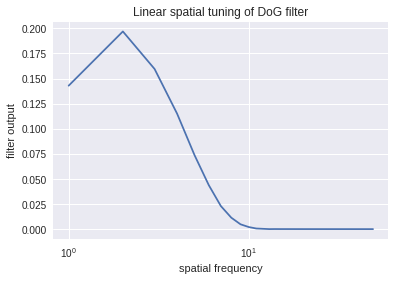

In [0]:
# Basic white-noise analysis:
# 1. Record cell's spike output to many presentations of the the stimulus.
# 2. Keep track of the stimulus (~1 sec) preceding each spike.
# 3. Take the average of that stimulus for all spikes.
# 4. This is the spike-triggered average (STA). If you look at the frame ~50-100
# ms prior to spiking, it often looks like a difference-of-Gaussians. 


# What is the consequence off this type of receptive-field structure?

# So, how does this spatial receptive field relate to the bandpass spatial tuning
# function that researchers measure for visual neurons? One way (the hard way) to
# determine this would be to filter a bunch of gratings with the receptive 
# field and see how the output changes as a function of the gratings' spatial
# frequencies. 

# [Please don't read past this point in this section if you are unfamiliar
# with basic Fourier analysis.]

# But this is the same thing as the amplitude spectrum of the receptive field.
# Let's do it the easy way.

# Take the Fourier transform of the receptive field
N = len(rf)
yf = scipy.fftpack.fft(rf)


# Get the amplitude spectrum up to the Nyquist limit discarding the F0...
A = 2.0/N * np.abs(yf[1:N//2])
xf = np.linspace(1, len(A), len(A))

# Plot the predicted spatial tuning function for the receptive field. Notice the
# similarity between this and tuning functions recorded in cells.
semilogx(xf, A)
xlabel('spatial frequency'); ylabel('filter output')
title('Linear spatial tuning of DoG filter')

Text(0, 0.5, 'response')

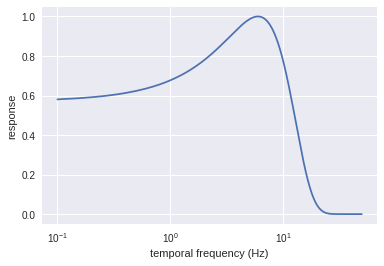

In [0]:
# Another common manipulation was/is to record a cell's responses to gratings or
# other stimuli at a range of temporal frequencies. The goal of this experiment
# is to understand how different cells and circuits in the visual system filter
# temporal information. Similar to the spatial tuning functions, temporal tuning
# functions are typically bandpass.

# Define some spatial frequencies.
tf = np.linspace(0.1,50,1000)
centerFrequency = 6
bandwidth = 8


# Often, a cell's spike output looked a lot like this... Note: I'm showing the
# plots on a logarithmic x-axis out of convention. If you prefer to see it on a
# linear axis change 'semilogx' to 'plot'...
semilogx(tf, gaussFun(tf,1, centerFrequency, bandwidth))
xlabel('temporal frequency (Hz)'); ylabel('response')

Text(0, 0.5, 'filter amplitude')

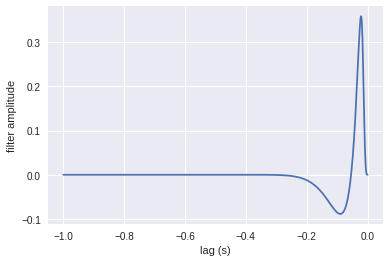

In [0]:
# Instead of the "spatial" receptive field, let's look at the temporal receptive
# field. This is often called the temporal filter.


# We'll use a basic temporal filter function used by many retinal researchers.
# If you want to know specifics, please ask me in class...
def temporalFun(t, p):
  return p[0] * (((t/p[1])**p[5])/(1+((t/p[1])**p[5]))) * np.exp(-((t/p[2]))) * np.cos(((2*np.pi*t)/p[3])+(2*np.pi*p[4]/360))


# Define temporal parameters.
tparams = [2.699101600403141,   0.017693386617024,   0.037119750110715,   0.586510918255136,  56.559161047519765,   4.001435007252049]

t = np.linspace(0,1,1001)
tfilter = temporalFun(t, tparams)
plot(-t,tfilter)
xlabel('lag (s)'); ylabel('filter amplitude')

Text(0.5, 1.0, 'Tuning of linear temporal filter')

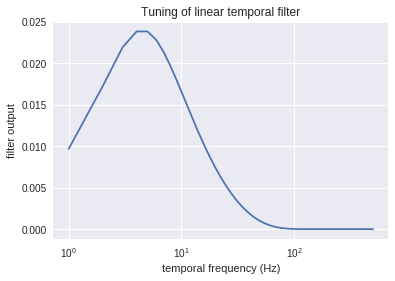

In [0]:
# The way to read this is that the y-axis is light intensity and the x-axis is time.
# At time zero, the cell spiked, so if we look back at what caused that spike, 
# there was a decrease in brightness beginning at about -200ms, followed by a 
# rapid increase in brightness that peaked about 50ms before the spike occurred. 

# Again, I'm showing the temporal filter for an ON cell. An OFF cell would be
# the negative of this...

# So, how does this temporal filter relate to the bandpass temporal tuning
# function that researchers measure for visual neurons? As above, we could
# filter sinusoidal stimuli of many different temporal frequencies with this
# temporal filter and produce a linear estimate for the response of the cell
# as a function of temporal frequency... Or we could do it the easy way again...

N = len(tfilter)
yf = scipy.fftpack.fft(tfilter)


# Get the amplitude spectrum up to the Nyquist limit. Discard the F0 component.
A = 2.0/N * np.abs(yf[1:N//2])
xf = np.linspace(1, len(A), len(A))

semilogx(xf, A)
xlabel('temporal frequency (Hz)'); ylabel('filter output')
title('Tuning of linear temporal filter')



In [0]:
# Here are the key concepts I'd like you to take away from this tutorial:
#
# 1. Researchers have been using tools developed for linear systems
# analysis to study the visual system for ~6 decades. These tools include
# the widespread use of periodic (sinusoidal) and uncorrelated
# (white) stimuli. 
#
# 2. You will see both of these stimuli used extensively, but it
# is important to understand that they are really measuring two
# sides of the same coin: period stimuli such as gratings measure
# properties of the cell in the frequency domain and white noise
# stimuli measure properties in the space and/or time domain.
#
# 3. The interpretation of data from these experiments rely on
# assumptions of linear processing in the circuitry prior to
# cell you're recording from. However, we now know that there are
# many nonlinear processes happening in space, time, and synaptic
# release machinery. This does not mean that linear systems analysis
# is completely invalidated, but (in my opinion) it should be viewed
# as one of many tools for studying neural systems. As with any tool
# it does certain tasks well, but not others. As is always the case
# in science, we need to be very careful about how we interpret
# the results of any single experiment/paradigm and bring as many
# techniques as possible to bear to answer a question.